Problem Statement

The objective of this data science project is to develop a predictive model that accurately forecasts the sales of each product at specific stores for BigMart. By analyzing the provided 2013 sales data for 1559 products across 10 stores in different cities, along with defined attributes for each product and store, the project aims to identify the key properties of products and stores that significantly impact sales.

Ultimately, the developed predictive model will enable BigMart to gain valuable insights into the factors influencing sales, empowering them to make informed decisions to enhance their sales strategies and optimize product and store performance.

Hypothesis Generation

1. Hypothesis: The location of the store has a significant impact on product sales.
   Explanation: Stores located in densely populated areas or areas with higher disposable income may experience higher sales due to increased foot traffic and purchasing power.

2. Hypothesis: The size of the store influences product sales.
   Explanation: Larger stores may have a wider variety of products and more shelf space, potentially leading to higher sales as customers have more options to choose from.

3. Hypothesis: Products with higher visibility within the store tend to have higher sales.
   Explanation: Products placed in prominent areas, such as near the entrance or checkout counters, are more likely to catch the attention of customers, resulting in increased sales.

4. Hypothesis: Products with lower prices have higher sales.
   Explanation: Customers are often attracted to products with competitive prices, leading to increased sales volume for items priced lower compared to similar products.

5. Hypothesis: Products with effective marketing promotions experience higher sales.
   Explanation: Products that are actively promoted through advertising, discounts, or special offers tend to generate more customer interest and drive higher sales.

6. Hypothesis: Seasonal factors impact product sales.
   Explanation: Certain products may experience higher demand during specific seasons or holidays, leading to fluctuations in sales throughout the year.

7. Hypothesis: Product attributes, such as brand, quality, and packaging, influence sales.
   Explanation: Customers may have preferences for specific brands, quality levels, or attractive packaging, which can impact their purchasing decisions and ultimately affect sales.

By testing and analyzing these hypotheses using the provided sales data and attributes, we can gain insights into the factors that play a significant role in determining product sales at BigMart stores.

Importing Libraries

In [703]:
import csv
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

Loading Data

In [704]:
train_data = pd.read_csv(r'D:\Summer 23\Technolabs\Mini Project\Train.csv')
test_data = pd.read_csv(r'D:\Summer 23\Technolabs\Mini Project\test.csv')

Data Visualisation

In [705]:
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [706]:
train_data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [707]:
train_data.shape

(8523, 12)

In [708]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


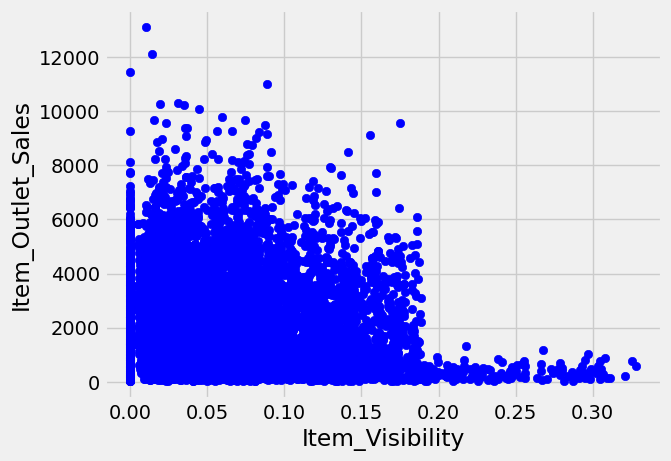

In [743]:
plt.scatter(train_data['Item_Visibility'], train_data['Item_Outlet_Sales'], c ="blue")
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
# To show the plot
plt.show()

Dropping Duplicates

In [710]:
train_data.drop_duplicates(keep=False, inplace=True)

Handling Missing Data

In [711]:
# Seeing which columns have missing data so we can deal with them
missing_values_count = train_data.isnull().sum()
missing_values_count

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [712]:
train_data.loc[train_data['Item_Identifier']=='FDP10']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
585,FDP10,19.0,Low Fat,0.128066,Snack Foods,104.3622,OUT035,2004,Small,Tier 2,Supermarket Type1,1905.5196
2623,FDP10,19.0,Low Fat,0.128815,Snack Foods,107.6622,OUT017,2007,NaN,Tier 2,Supermarket Type1,1164.4842
3382,FDP10,19.0,Low Fat,0.128289,Snack Foods,104.9622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1164.4842
4585,FDP10,19.0,Low Fat,0.128090,Snack Foods,107.0622,OUT046,1997,Small,Tier 1,Supermarket Type1,1376.2086
6087,FDP10,19.0,Low Fat,0.128350,Snack Foods,106.5622,OUT045,2002,NaN,Tier 2,Supermarket Type1,1482.0708
7883,FDP10,19.0,Low Fat,0.127984,Snack Foods,107.6622,OUT013,1987,High,Tier 3,Supermarket Type1,1270.3464


In [713]:
train_data['Item_Identifier'].value_counts()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

In [714]:
# Replacing missing values in the Item_Weight column  with the mean value of items with the same Item_Identifier 
train_data['Item_Weight'].fillna(train_data.groupby('Item_Identifier')['Item_Weight'].transform('mean'), inplace = True)

# Replace the rest using interpolation
train_data['Item_Weight'].interpolate(method = 'linear', inplace = True)


In [715]:
testmissing_values_count = test_data.isnull().sum()
testmissing_values_count

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [716]:
# Replacing missing values in the Item_Weight column  with the mean value of items with the same Item_Identifier 
test_data['Item_Weight'].fillna(train_data.groupby('Item_Identifier')['Item_Weight'].transform('mean'), inplace = True)

# Replace the rest using interpolation
test_data['Item_Weight'].interpolate(method = 'linear', inplace = True)

In [717]:
train_data.loc[train_data['Outlet_Identifier']=='OUT045'].nunique()

Item_Identifier              929
Item_Weight                  335
Item_Fat_Content               5
Item_Visibility              863
Item_Type                     16
Item_MRP                     897
Outlet_Identifier              1
Outlet_Establishment_Year      1
Outlet_Size                    0
Outlet_Location_Type           1
Outlet_Type                    1
Item_Outlet_Sales            776
dtype: int64

In [718]:
sum = train_data['Outlet_Size'].unique().sum

In [719]:
# Replacing missing values in the Outlet_Size column  with the mode value of the column
test_data['Outlet_Size'] = train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0])

In [720]:
# Replacing missing values in the Outlet_Size column  with the mode value of the column
train_data['Outlet_Size'] = train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0])

In [721]:
missing_values_count = train_data.isnull().sum()
missing_values_count

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Data Encoding

In [722]:
train_data["Item_Identifier"].nunique()

1559

In [723]:
train_data['Item_Fat_Content'].nunique()

5

In [724]:
train_data['Item_Type'].nunique()

16

In [725]:
train_data['Outlet_Identifier'].nunique()

10

In [726]:
train_data['Outlet_Size'].nunique()

3

In [727]:
train_data['Outlet_Location_Type'].nunique()

3

In [728]:
train_data['Outlet_Type'].nunique()

4

Label Encoding

In [729]:
# creating instance of labelencoder
labelencoder = preprocessing.LabelEncoder()
# Assigning numerical values and storing in another column
train_data['Item_Identifier_Encoded'] = labelencoder.fit_transform(train_data['Item_Identifier'])
test_data['Item_Identifier_Encoded'] = labelencoder.transform(test_data['Item_Identifier'])
train_data['Item_Type_Encoded'] = labelencoder.fit_transform(train_data['Item_Type'])
test_data['Item_Type_Encoded'] = labelencoder.transform(test_data['Item_Type'])
train_data['Outlet_Identifier_Encoded'] = labelencoder.fit_transform(train_data['Outlet_Identifier'])
test_data['Outlet_Identifier_Encoded'] = labelencoder.transform(test_data['Outlet_Identifier'])
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_Encoded,Item_Type_Encoded,Outlet_Identifier_Encoded
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,156,4,9
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8,14,3
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,662,10,9
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,1121,6,0
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1297,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,370,13,1
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,897,0,7
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,1357,8,6
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,681,13,3


In [730]:
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Identifier_Encoded,Item_Type_Encoded,Outlet_Identifier_Encoded
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1114,13,9
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,1078,4,2
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,1420,11,0
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,817,13,2
4,FDY38,8.930,Regular,0.118599,Dairy,234.2300,OUT027,1985,High,Tier 3,Supermarket Type3,1197,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Medium,Tier 1,Supermarket Type1,233,13,8
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,High,Tier 3,Supermarket Type2,308,15,3
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,1426,8,7
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,521,3,2


One Hot Encoding

In [731]:
encoded_df_IFC = pd.get_dummies(train_data['Item_Fat_Content'])
encoded_df_OS = pd.get_dummies(train_data['Outlet_Size'])
encoded_df_OLT = pd.get_dummies(train_data['Outlet_Location_Type'])
encoded_df_OT = pd.get_dummies(train_data['Outlet_Type'])
train_data = pd.concat([train_data, encoded_df_IFC], axis=1, join="inner")
train_data = pd.concat([train_data, encoded_df_OS], axis=1, join="inner")
train_data = pd.concat([train_data, encoded_df_OLT], axis=1, join="inner")
train_data = pd.concat([train_data, encoded_df_OT], axis=1, join="inner")

In [732]:
testencoded_df_IFC = pd.get_dummies(test_data['Item_Fat_Content'])
testencoded_df_OS = pd.get_dummies(test_data['Outlet_Size'])
testencoded_df_OLT = pd.get_dummies(test_data['Outlet_Location_Type'])
testencoded_df_OT = pd.get_dummies(test_data['Outlet_Type'])
test_data = pd.concat([test_data, testencoded_df_IFC], axis=1, join="inner")
test_data = pd.concat([test_data, testencoded_df_OS], axis=1, join="inner")
test_data = pd.concat([test_data, testencoded_df_OLT], axis=1, join="inner")
test_data = pd.concat([test_data, testencoded_df_OT], axis=1, join="inner")

In [733]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,High,Medium,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,...,False,True,False,True,False,False,False,True,False,False
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,...,False,True,False,False,False,True,False,False,True,False
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,...,False,True,False,True,False,False,False,True,False,False
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,...,False,True,False,False,False,True,True,False,False,False
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,...,True,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,...,True,False,False,False,False,True,False,True,False,False
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,...,False,True,False,False,True,False,False,True,False,False
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,...,False,False,True,False,True,False,False,True,False,False
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,...,False,True,False,False,False,True,False,False,True,False


In [734]:
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,High,Medium,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,...,False,True,False,True,False,False,False,True,False,False
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,...,False,True,False,False,True,False,False,True,False,False
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,...,False,True,False,False,False,True,True,False,False,False
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,...,False,True,False,False,True,False,False,True,False,False
4,FDY38,8.930,Regular,0.118599,Dairy,234.2300,OUT027,1985,High,Tier 3,...,True,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Medium,Tier 1,...,False,True,False,True,False,False,False,True,False,False
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,High,Tier 3,...,True,False,False,False,False,True,False,False,True,False
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,...,False,True,False,False,True,False,False,True,False,False
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,...,False,True,False,False,True,False,False,True,False,False


In [735]:
# Drop columns that have been encoded
train_data = train_data.drop(['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'], axis=1)
train_data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_Encoded,Item_Type_Encoded,Outlet_Identifier_Encoded,LF,Low Fat,...,High,Medium,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.300,0.016047,249.8092,1999,3735.1380,156,4,9,False,True,...,False,True,False,True,False,False,False,True,False,False
1,5.920,0.019278,48.2692,2009,443.4228,8,14,3,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.500,0.016760,141.6180,1999,2097.2700,662,10,9,False,True,...,False,True,False,True,False,False,False,True,False,False
3,19.200,0.000000,182.0950,1998,732.3800,1121,6,0,False,False,...,False,True,False,False,False,True,True,False,False,False
4,8.930,0.000000,53.8614,1987,994.7052,1297,9,1,False,True,...,True,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,370,13,1,False,True,...,True,False,False,False,False,True,False,True,False,False
8519,8.380,0.046982,108.1570,2002,549.2850,897,0,7,False,False,...,False,True,False,False,True,False,False,True,False,False
8520,10.600,0.035186,85.1224,2004,1193.1136,1357,8,6,False,True,...,False,False,True,False,True,False,False,True,False,False
8521,7.210,0.145221,103.1332,2009,1845.5976,681,13,3,False,False,...,False,True,False,False,False,True,False,False,True,False


In [736]:
# Drop columns that have been encoded
test_data = test_data.drop(['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'], axis=1)
test_data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_Encoded,Item_Type_Encoded,Outlet_Identifier_Encoded,LF,Low Fat,Regular,...,High,Medium,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,20.750,0.007565,107.8622,1999,1114,13,9,False,True,False,...,False,True,False,True,False,False,False,True,False,False
1,8.300,0.038428,87.3198,2007,1078,4,2,False,False,False,...,False,True,False,False,True,False,False,True,False,False
2,14.600,0.099575,241.7538,1998,1420,11,0,False,True,False,...,False,True,False,False,False,True,True,False,False,False
3,7.315,0.015388,155.0340,2007,817,13,2,False,True,False,...,False,True,False,False,True,False,False,True,False,False
4,8.930,0.118599,234.2300,1985,1197,4,5,False,False,True,...,True,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500,0.013496,141.3154,1997,233,13,8,False,False,True,...,False,True,False,True,False,False,False,True,False,False
5677,7.600,0.142991,169.1448,2009,308,15,3,False,False,True,...,True,False,False,False,False,True,False,False,True,False
5678,10.000,0.073529,118.7440,2002,1426,8,7,False,True,False,...,False,True,False,False,True,False,False,True,False,False
5679,15.300,0.000000,214.6218,2007,521,3,2,False,False,True,...,False,True,False,False,True,False,False,True,False,False


Bivarient Analysis

                           Item_Weight  Item_Visibility  Item_MRP   
Item_Weight                   1.000000        -0.009163  0.025965  \
Item_Visibility              -0.009163         1.000000 -0.001315   
Item_MRP                      0.025965        -0.001315  1.000000   
Outlet_Establishment_Year    -0.013274        -0.074834  0.005020   
Item_Outlet_Sales             0.012956        -0.128625  0.567574   
Item_Identifier_Encoded       0.048321        -0.025482  0.012853   
Item_Type_Encoded             0.035442        -0.035249  0.032651   
Outlet_Identifier_Encoded    -0.007598        -0.100439  0.003319   
LF                            0.003601         0.001885 -0.006947   
Low Fat                       0.026102        -0.046386 -0.000466   
Regular                      -0.027643         0.047631  0.008299   
low fat                      -0.006842        -0.001860 -0.011904   
reg                           0.003279         0.000523 -0.008865   
High                          0.00

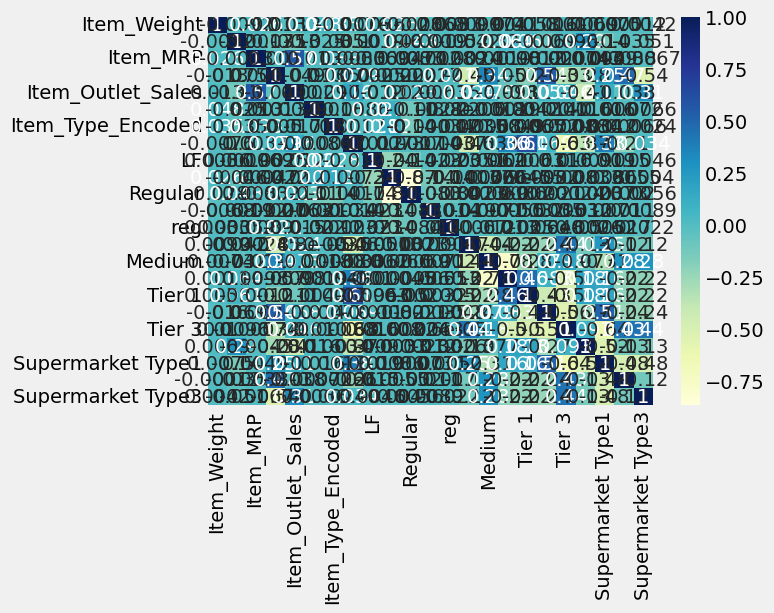

In [737]:
import matplotlib.pyplot as mp
import seaborn as sb
print(train_data.corr())
  
# plotting correlation heatmap
dataplot = sb.heatmap(train_data.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
mp.show()

Univarient Analysis

In [738]:
#calculate mean of 'Item_Visibility'
train_data['Item_Visibility'].mean()

0.06613202877895108

In [739]:
#calculate median of 'Outlet_Establishment_Year' 
train_data['Outlet_Establishment_Year'].median() 

1999.0

In [740]:
#calculate standard deviation of 'Item_Visibility'
train_data['Item_Visibility'].std() 

0.05159782232113512

Treating Otliers

In [741]:
train_data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_Encoded,Item_Type_Encoded,Outlet_Identifier_Encoded,LF,Low Fat,...,High,Medium,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.300,0.016047,249.8092,1999,3735.1380,156,4,9,False,True,...,False,True,False,True,False,False,False,True,False,False
1,5.920,0.019278,48.2692,2009,443.4228,8,14,3,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.500,0.016760,141.6180,1999,2097.2700,662,10,9,False,True,...,False,True,False,True,False,False,False,True,False,False
3,19.200,0.000000,182.0950,1998,732.3800,1121,6,0,False,False,...,False,True,False,False,False,True,True,False,False,False
4,8.930,0.000000,53.8614,1987,994.7052,1297,9,1,False,True,...,True,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,370,13,1,False,True,...,True,False,False,False,False,True,False,True,False,False
8519,8.380,0.046982,108.1570,2002,549.2850,897,0,7,False,False,...,False,True,False,False,True,False,False,True,False,False
8520,10.600,0.035186,85.1224,2004,1193.1136,1357,8,6,False,True,...,False,False,True,False,True,False,False,True,False,False
8521,7.210,0.145221,103.1332,2009,1845.5976,681,13,3,False,False,...,False,True,False,False,False,True,False,False,True,False


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

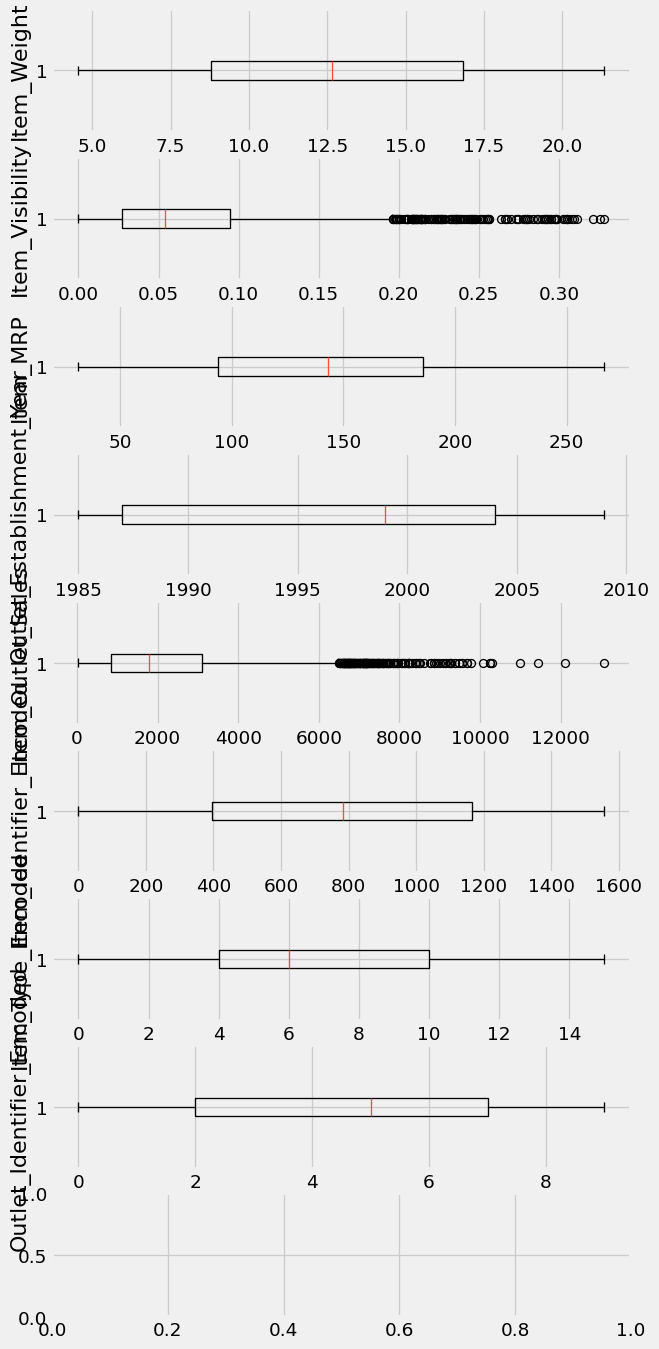

In [742]:
fig, axs = plt.subplots(9,1,dpi=95, figsize=(7,17))
i = 0
for col in train_data.columns:
    axs[i].boxplot(train_data[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

In [ ]:
# Identify the quartiles
q1, q3 = np.percentile(train_data['Item_Visibility'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = train_data[(train_data['Item_Visibility'] >= lower_bound)
                & (train_data['Item_Visibility'] <= upper_bound)]

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

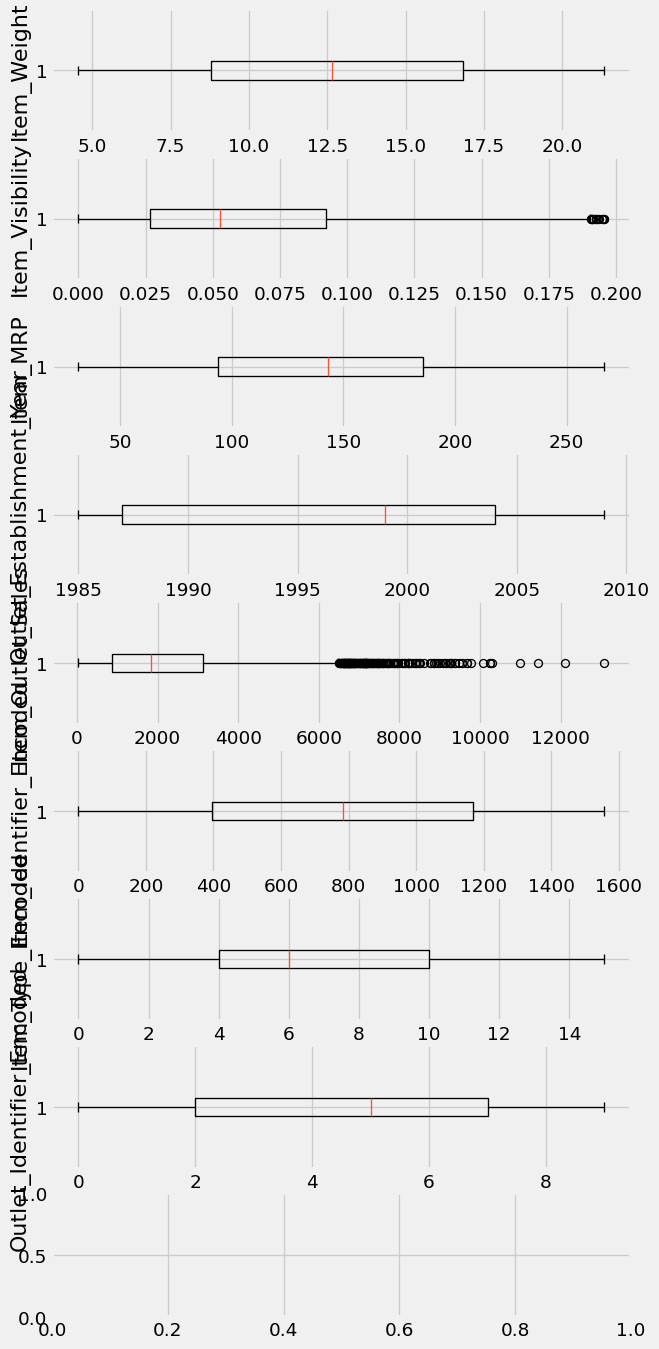

In [ ]:
fig, axs = plt.subplots(9,1,dpi=95, figsize=(7,17))
i = 0
for col in clean_data.columns:
    axs[i].boxplot(clean_data[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

Splitting Data

In [744]:
train_x = train_data.drop(['Item_Outlet_Sales'],axis=1)
train_y = train_data['Item_Outlet_Sales']

In [745]:
#from sklearn.preprocessing import MinMaxScaler
# initialising the MinMaxScaler
#scaler = MinMaxScaler(feature_range=(0, 1))
 
# learning the statistical parameters for each of the data and transforming
#train_data = scaler.fit_transform(train_x)
#test_data = scaler.transform(test_data)

In [746]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(train_x)
train_x = scaler.transform(train_x)
test_data = scaler.transform(test_data)

In [747]:
train_x

array([[-0.7695976 , -0.97073217,  1.74745381, ...,  0.72680189,
        -0.34955064, -0.35102831],
       [-1.49721948, -0.90811123, -1.48902325, ..., -1.37589075,
         2.86081583, -0.35102831],
       [ 0.99563891, -0.95691733,  0.01004021, ...,  0.72680189,
        -0.34955064, -0.35102831],
       ...,
       [-0.48974303, -0.59978449, -0.89720755, ...,  0.72680189,
        -0.34955064, -0.35102831],
       [-1.21951764,  1.53287976, -0.60797692, ..., -1.37589075,
         2.86081583, -0.35102831],
       [ 0.4144025 , -0.41193591, -1.05226104, ...,  0.72680189,
        -0.34955064, -0.35102831]])

In [748]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(train_x,train_y ,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

Models

Linear Regression

In [749]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

In [750]:
from sklearn.metrics import r2_score
lr_model = LinearRegression()
lr_model.fit(X_train , y_train)
lr_prediction=lr_model.predict(X_test)
lr_score = r2_score(y_test, lr_prediction)
print("The accuracy of our model is {}%".format(round(lr_score, 2) *100))
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(y_test, lr_prediction)
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The accuracy of our model is 56.00000000000001%
The Mean Absolute Error of our Model is 842.57


Random Forest

In [751]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train , y_train)
rf_prediction=rf_model.predict(X_test)

In [752]:
from sklearn.metrics import r2_score
rf_score = r2_score(y_test, rf_prediction)
print("The accuracy of our model is {}%".format(round(rf_score, 2) *100))
score = mean_absolute_error(y_test, rf_prediction)
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The accuracy of our model is 54.0%
The Mean Absolute Error of our Model is 812.44


XGBoost

In [753]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train , y_train)
xgb_prediction=xgb_model.predict(X_test)
xgb_score = r2_score(y_test, xgb_prediction)
print("The accuracy of our model is {}%".format(round(xgb_score, 2) *100))
score = mean_absolute_error(y_test, xgb_prediction)
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The accuracy of our model is 50.0%
The Mean Absolute Error of our Model is 833.47


In [754]:
from sklearn.model_selection import cross_val_score,GridSearchCV

# Various hyper-parameters to tune
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[16:10:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[16:10:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

0.5706438460759655
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [755]:
xgb_grid_prediction=xgb_grid.predict(X_test)
xgb_grid_score = r2_score(y_test, xgb_grid_prediction)
print("The accuracy of our model is {}%".format(round(xgb_grid_score, 2) *100))
score = mean_absolute_error(y_test, xgb_grid_prediction)
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The accuracy of our model is 56.00000000000001%
The Mean Absolute Error of our Model is 787.77


Regularized Linear Regression

Ridge Regression

In [756]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [757]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

1124.9421543735755
0.5638794111246077
1135.8230499609847
0.5608591294388481


Lasso Regression 

In [758]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

1124.942772954773
0.5638789314980434
1135.8423228826744
0.5608442264142706


c:\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.565e+09, tolerance: 1.855e+06
  model = cd_fast.enet_coordinate_descent(


Saving the Models and Predicting Test Lables

In [759]:
import pickle
  
# Save the trained model as a pickle string.
saved_model = pickle.dumps(lr_model)
  
# Load the pickled model
lr_from_pickle = pickle.loads(saved_model)
  
# Use the loaded pickled model to make predictions
lr_from_pickle.predict(test_data)

array([1832.98830215, 1439.11330215, 1913.73830215, ..., 1833.61330215,
       3561.12892715, 2967.62892715])

In [764]:
# Save the trained model as a pickle string.
rr_saved_model = pickle.dumps(rr)
  
# Load the pickled model
rr_from_pickle = pickle.loads(rr_saved_model)
  
# Use the loaded pickled model to make predictions
rr_from_pickle.predict(test_data)

array([1821.23329557, 1486.19331374, 1902.02474819, ..., 1819.70657303,
       3575.91639169, 3017.07731723])

In [763]:
# Save the trained model as a pickle string.
xgb_saved_model = pickle.dumps(xgb_model)
  
# Load the pickled model
xgb_from_pickle = pickle.loads(xgb_saved_model)
  
# Use the loaded pickled model to make predictions
xgb_from_pickle.predict(test_data)

array([1977.7458 , 1093.3011 ,  332.03766, ..., 1911.4054 , 3980.5542 ,
       1888.0023 ], dtype=float32)

In [762]:
# Save the trained model as a pickle string.
xgb_grid_saved_model = pickle.dumps(xgb_grid)
  
# Load the pickled model
xgb_grid_from_pickle = pickle.loads(xgb_grid_saved_model)
  
# Use the loaded pickled model to make predictions
xgb_grid_from_pickle.predict(test_data)

array([1596.4097, 1135.7871,  570.6605, ..., 1847.7589, 3922.6963,
       1357.3013], dtype=float32)

In [761]:
# Save the trained model as a pickle string.
rf_saved_model = pickle.dumps(rf_model)
  
# Load the pickled model
rf_from_pickle = pickle.loads(rf_saved_model)
  
# Use the loaded pickled model to make predictions
rf_from_pickle.predict(test_data)

array([1887.895874, 1320.328006,  471.31982 , ..., 1937.717688,
       4075.648094, 1663.860832])

In [760]:
# Save the trained model as a pickle string.
lasso_saved_model = pickle.dumps(model_lasso)
  
# Load the pickled model
lasso_from_pickle = pickle.loads(lasso_saved_model)
  
# Use the loaded pickled model to make predictions
lasso_from_pickle.predict(test_data)

array([1819.47538409, 1486.29351899, 1902.33823296, ..., 1821.27415941,
       3575.88227999, 2972.12517034])